In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
sns.set()
sns.set_context(rc = {'patch.linewidth': 0.0})
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from quantification.flexibility_quantification import shifting_time

In [17]:
storage_types_percentage = pd.DataFrame(index=['very short', 'short', 'medium', 'long'], columns=['test'])

# Determine storage equivalent

In [8]:
residual_load = pd.read_csv('residual_load.csv', index_col=0, header=None, parse_dates=True)

<AxesSubplot:xlabel='0'>

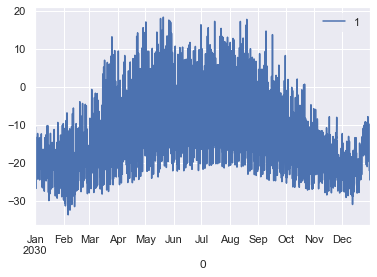

In [12]:
residual_load.plot()

In [15]:
storage_equivalent = shifting_time(residual_load[1])
storage_equivalent.to_csv('storage_equivalent.csv')

C:\Users\Anya.Heider\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:6701: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Energy balanced. Shifting time finished.


In [18]:
storage_equivalent = pd.read_csv('storage_equivalent.csv', index_col=0, parse_dates=[1,3,4])
storage_equivalent.storage_duration = pd.to_timedelta(storage_equivalent.storage_duration)
storage_equivalent['storage_duration_numerical'] = pd.to_numeric(storage_equivalent.storage_duration)/3600/1e9
storage_equivalent['abs_energy_shifted'] = storage_equivalent.energy_shifted.abs()
energy_shifted_per_shifting_time = storage_equivalent[['abs_energy_shifted', 'storage_duration_numerical']].groupby('storage_duration_numerical').sum()
storage_types_percentage.loc['very short', 'test'] = energy_shifted_per_shifting_time.loc[energy_shifted_per_shifting_time.index <= 24].sum().values[0]
storage_types_percentage.loc['short', 'test'] = energy_shifted_per_shifting_time.loc[(energy_shifted_per_shifting_time.index <= 24*7)&(energy_shifted_per_shifting_time.index > 7)].sum().values[0]
storage_types_percentage.loc['medium', 'test'] = energy_shifted_per_shifting_time.loc[(energy_shifted_per_shifting_time.index <= 24*30)&(energy_shifted_per_shifting_time.index > 24*7)].sum().values[0]
storage_types_percentage.loc['long', 'test'] = energy_shifted_per_shifting_time.loc[(energy_shifted_per_shifting_time.index > 30*24)].sum().values[0]

Text(0, 0.5, 'Shifted Energy [MWh]')

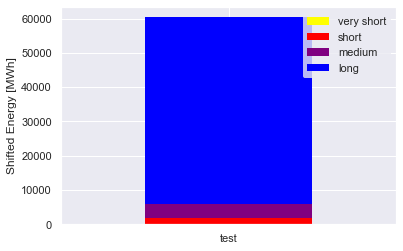

In [20]:
storage_types_percentage.T.plot.bar(stacked=True, color=['yellow', 'red', 'purple', 'blue'])
plt.xticks(rotation = 0)
plt.ylabel('Shifted Energy [MWh]')